In [19]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [23]:
# Cargar datos
df = pd.read_csv('C:/Users/DIEGO ALEJANDRO RAMI/Documents/Unad/UNAD semestre 3/Analisis de datos/Traea 4/archive (3)/Mall_Customers.csv')

In [25]:
# 1. Verificar valores faltantes
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [27]:
# 2. Eliminar columnas que no son útiles para el clustering
df = df.drop(columns=['CustomerID'])

In [61]:
# Seleccionamos las características para clustering
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [63]:
# Escalado
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

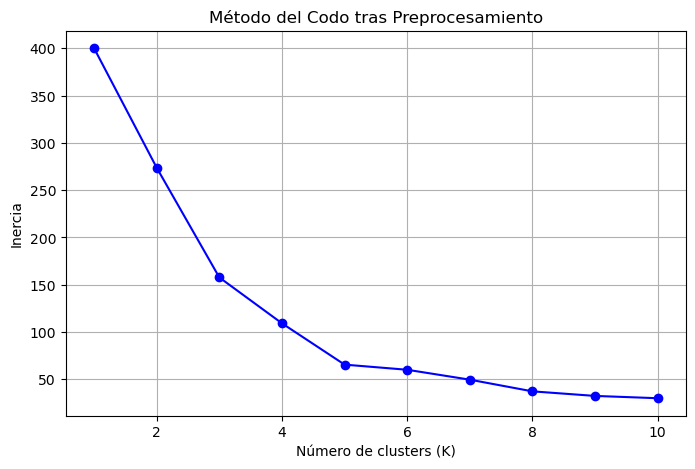

In [65]:
# Encontramos el K optimo con el metodo del codo
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Inercia')
plt.title('Método del Codo tras Preprocesamiento')
plt.grid(True)
plt.show()

In [67]:
# K-means con K=5
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

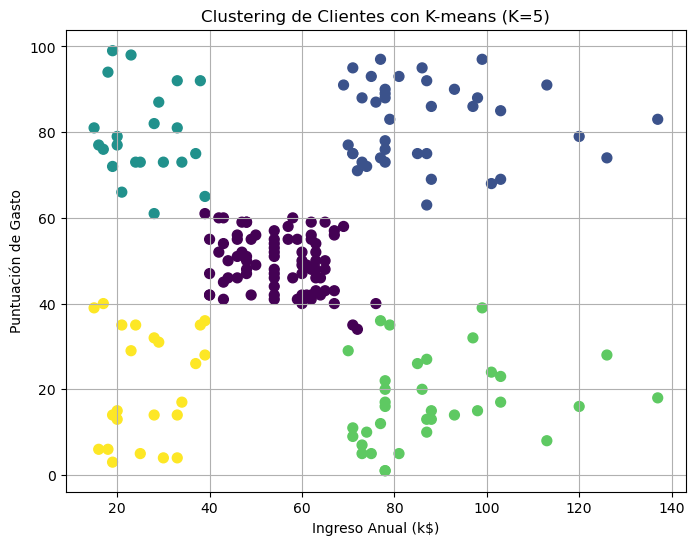

In [69]:
# Visualización
plt.figure(figsize=(8, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            c=df['Cluster'], cmap='viridis', s=50)
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntuación de Gasto')
plt.title('Clustering de Clientes con K-means (K=5)')
plt.grid(True)
plt.show()

In [71]:
# Usamos los datos escalados y las etiquetas de cluster
silhouette_avg = silhouette_score(scaled_features, df['Cluster'])
calinski_score = calinski_harabasz_score(scaled_features, df['Cluster'])

print(f"Coeficiente de Silhouette: {silhouette_avg:.3f}")
print(f"Índice de Calinski-Harabasz: {calinski_score:.2f}")

Coeficiente de Silhouette: 0.555
Índice de Calinski-Harabasz: 248.65


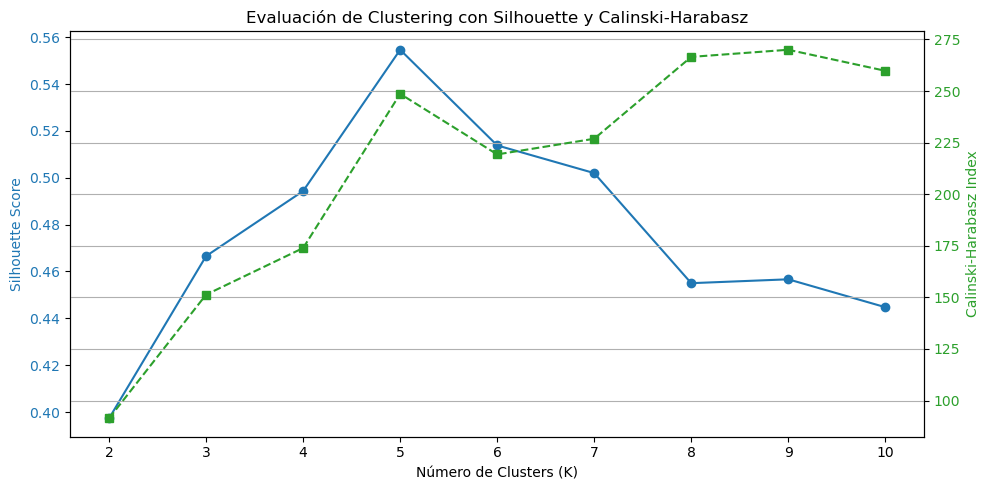

In [73]:
silhouette_scores = []
calinski_scores = []
k_values = range(2, 11)  # desde 2 hasta 10 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    
    silhouette_scores.append(silhouette_score(scaled_features, labels))
    calinski_scores.append(calinski_harabasz_score(scaled_features, labels))

# Graficar ambas métricas
fig, ax1 = plt.subplots(figsize=(10, 5))

# Eje izquierdo - Silhouette
color = 'tab:blue'
ax1.set_xlabel('Número de Clusters (K)')
ax1.set_ylabel('Silhouette Score', color=color)
ax1.plot(k_values, silhouette_scores, 'o-', color=color, label='Silhouette')
ax1.tick_params(axis='y', labelcolor=color)

# Eje derecho - Calinski-Harabasz
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Calinski-Harabasz Index', color=color)
ax2.plot(k_values, calinski_scores, 's--', color=color, label='Calinski-Harabasz')
ax2.tick_params(axis='y', labelcolor=color)

# Título y leyenda
plt.title('Evaluación de Clustering con Silhouette y Calinski-Harabasz')
fig.tight_layout()
plt.grid(True)
plt.show()